In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/Frozen_Dessert_Production.csv',
                 parse_dates=True,index_col='DATE')

In [ ]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [ ]:
df.columns = ['Production']

In [ ]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


<Axes: xlabel='DATE'>

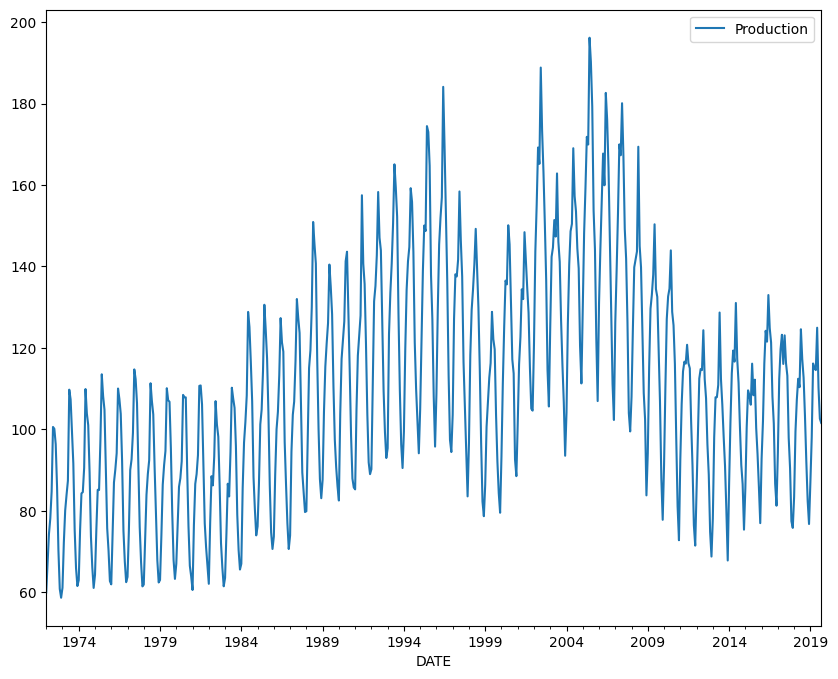

In [ ]:
df.plot(figsize=(10,8))

In [ ]:
len(df)

573

In [ ]:
test_size = 18
test_index = len(df) - test_size

In [ ]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 12

In [ ]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [ ]:
X,y = generator[0]

In [ ]:
X

array([[[0.00947104],
        [0.06108982],
        [0.11326273],
        [0.14145625],
        [0.18982663],
        [0.30495972],
        [0.30154406],
        [0.27416065],
        [0.19736841],
        [0.08532665],
        [0.01561588],
        [0.        ]]])

In [ ]:
y

array([[0.01774221]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
n_features=1

In [ ]:
model = Sequential()

model.add(LSTM(130,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 130)                 │          68,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             131 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,771 (268.64 KB)

 Trainable params: 68,771 (268.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [ ]:
model.fit(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0344 - val_loss: 0.0026
Epoch 2/20
 15/543 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0108

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


543/543 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0097 - val_loss: 0.0019
Epoch 3/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0068 - val_loss: 0.0061
Epoch 4/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 5/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0054 - val_loss: 0.0018
Epoch 6/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0041 - val_loss: 0.0020
Epoch 7/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 8/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0044 - val_loss: 0.0020
Epoch 9/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0047 - val_loss: 0.0017
Epoch 10/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 11/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 12/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 13/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - l

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

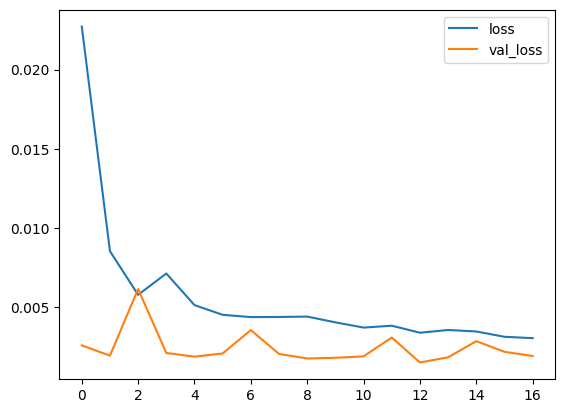

In [ ]:
losses.plot()

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-48-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test

,Production,Predictions
DATE,,
2018-04-01,112.4309,115.918869
2018-05-01,110.3544,120.200437
2018-06-01,124.5841,121.862685
2018-07-01,117.2215,118.802673
2018-08-01,112.6779,110.865857
2018-09-01,103.3118,99.008463
2018-10-01,92.1321,86.772299
2018-11-01,82.4347,76.187435
2018-12-01,76.7608,73.269239


<Axes: xlabel='DATE'>

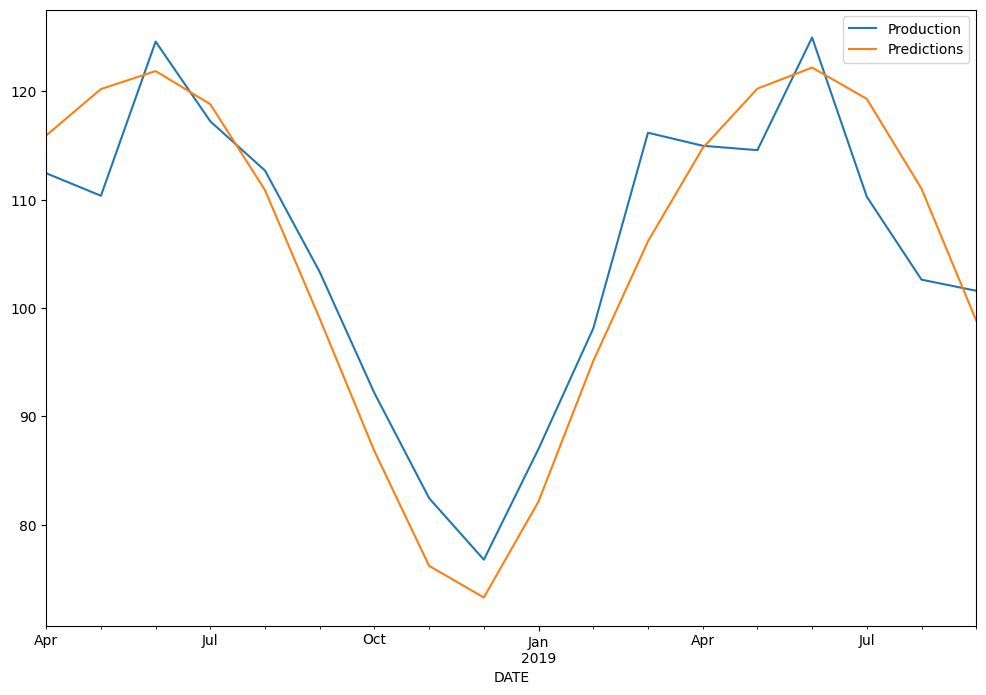

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test['Production'],test['Predictions']))

5.545499461425665

In [ ]:
mean_absolute_error(test['Production'],test['Predictions'])

4.755056857427004

In [ ]:
full_scaler = MinMaxScaler()

In [ ]:
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [ ]:
model = Sequential()

model.add(LSTM(130,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(generator,epochs=17)

Epoch 1/17
 17/561 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1429

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


561/561 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0333
Epoch 2/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0230
Epoch 3/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0057
Epoch 4/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0052
Epoch 5/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0048
Epoch 6/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0041
Epoch 7/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0039
Epoch 8/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0035
Epoch 9/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0034
Epoch 10/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0035
Epoch 11/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0033
Epoch 12/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0030
Epoch 13/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0028
Epoch 14/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0029
Epoch 15/17
561/561 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss:

In [ ]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)
periods = 18

for i in range(periods):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
forecast = full_scaler.inverse_transform(forecast)

In [ ]:
forecast_index = pd.date_range(start='2019-10-01',periods=periods,freq='MS')

In [ ]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Production'])

(579.0, 615.0)

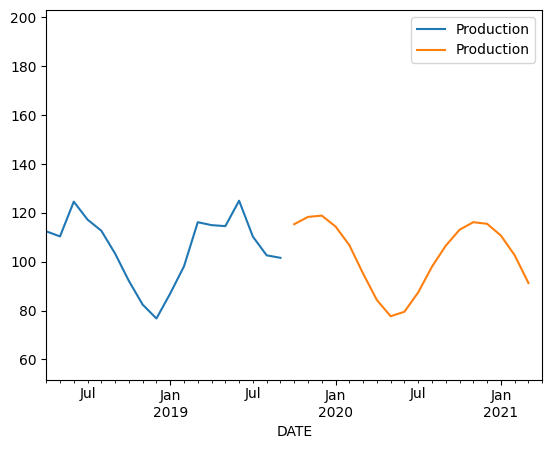

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-04-01','2021-04-01')

In [ ]:
forecast_df

,Production
2019-10-01,115.351354
2019-11-01,118.334605
2019-12-01,118.868466
2020-01-01,114.408293
2020-02-01,106.789160
2020-03-01,95.131308
2020-04-01,84.318000
2020-05-01,77.676878
2020-06-01,79.522233
2020-07-01,87.456983
